In [1]:
import keras
from keras import models, layers
from keras import datasets
from keras.utils import np_utils # one hot encdoing -- torch.max 부분 대체
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

In [2]:
# 1. Data Loading
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

(28, 28)
(60000, 28, 28)
(60000,)


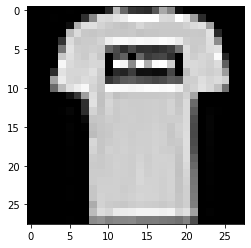

In [3]:
print(X_train[0].shape)
print(X_train.shape)
print(y_train.shape)
plt.figure()
plt.imshow(X_train[0])
plt.imshow(X_train[1], cmap='gray') # 1채널인데 cmap입힌 개념으로 보면 됨

In [4]:
# 2-1. preprocessing : flatten
L, W, H = X_train.shape
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# 2-2. preprocessing : scaling
X_train = X_train/255
X_test = X_test/255

X_train[0][100:105]

array([0.28627451, 0.        , 0.        , 0.00392157, 0.01568627])

In [6]:
# 2-3. preprocessing : one-hot-encoding
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
# 3. Model Generation
model = models.Sequential()

In [8]:
model.add(layers.Dense(100, activation='relu', input_shape=(W*H,)))
model.add(layers.Dropout(0.5)) # 50% 끊기
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25)) # 25% 감소
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# 4. loss, optimizer
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [10]:
# 5.학습
model.fit(X_train, Y_train, epochs=20,batch_size=100)


Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.8259 - accuracy: 0.7070
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.5556 - accuracy: 0.8030
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5081 - accuracy: 0.8199
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.4765 - accuracy: 0.8300
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.4613 - accuracy: 0.8346
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4448 - accuracy: 0.8431
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.4328 - accuracy: 0.8451
Epoch 8/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4246 - accuracy: 0.8473
Epoch 9/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4160 - accuracy: 0.8498
Epoch 10/20
60000/60000 [=============================

In [11]:
# 6. 평가
model_eval = model.evaluate(X_test,Y_test, batch_size=100)
print('Loss : {}, Accuracy : {}' .format(*model_eval))

# prunnung 전 : 0.345, 0.8870
# prunnung 후 : 0.437, 0.8450

10000/10000 [==============================] - 0s 15us/step
Loss : 0.3615138426423073, Accuracy : 0.8716999888420105


In [14]:
# 9. 시각화
# fit 트레이닝할 때 로그 메세지들을 다 모아서 리턴 == history
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.legend(['training', 'validation'])
    plt.savefig('C:/kjy/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload2/loss.png', dpi=300)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc')
    plt.legend(['training', 'validation'])
    plt.savefig('C:/kjy/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload2/acc.png', dpi=300)





In [15]:
history = model.fit(X_train,Y_train, epochs=10, batch_size = 100, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3724 - accuracy: 0.8629 - val_loss: 0.2942 - val_accuracy: 0.8932
Epoch 2/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.3684 - accuracy: 0.8658 - val_loss: 0.2891 - val_accuracy: 0.8931
Epoch 3/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.3666 - accuracy: 0.8664 - val_loss: 0.2929 - val_accuracy: 0.8888
Epoch 4/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3616 - accuracy: 0.8664 - val_loss: 0.3000 - val_accuracy: 0.8901
Epoch 5/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.3559 - accuracy: 0.8687 - val_loss: 0.2987 - val_accuracy: 0.8861
Epoch 6/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.3572 - accuracy: 0.8698 - val_loss: 0.2906 - val_accuracy: 0.8918
Epoch 7/10
48000/48000 [==============================] - 2s 41us/st

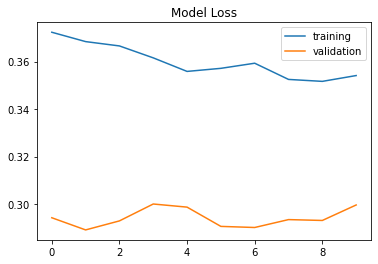

In [16]:
plot_loss(history)

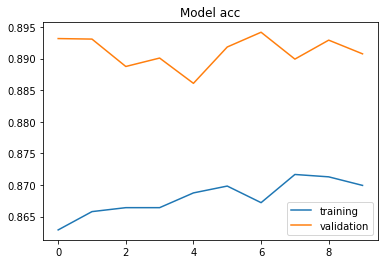

In [17]:
plot_acc(history)

### Image Data Plotting

In [ ]:
plt.figure()
plt.imshow(X_train[60000-200].reshape(W,H), cmap='gray')

In [ ]:
row = 2
col = 5

grid = range(10)
fig, axs=plt.subplots(nrows = row, ncols = col, figsize=(9,6), subplot_kw = {'xticks':[ ],'yticks':[ ]})

# axs # 이미지 확인을 위한 객체

for ax, index in zip(axs.flat, grid):
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    
plt.show()
